In [5]:
import pandas as pd

combination_df = pd.read_csv('/kaggle/input/stanza-goodnews/results/combination_out.csv')
combination_df.head()

,Unnamed: 0,dataset_id,text,emotion,dataset_cue,stanza_root,coincided
0,0,7d3fe468,Cops in One Village Have Been Convicted of 70 ...,anger,convicted,convicted,1
1,1,86693d59,DIY penis enlargements are a 'nationwide probl...,negative_surprise,problem,problem,1
2,2,0fb40e90,Dam breaking: New Epstein accuser comes forward,anger,accuser,breaking,0
3,3,fa7750d6,David Beckham gets six-month driving ban for u...,negative_surprise,ban,gets,0
4,4,695ea7a2,Dead sea turtle found with spear through head ...,sadness,dead,found,0


In [6]:
print(f'The dataset contains {len(combination_df)} texts')
print(f'There are {len(set(combination_df.emotion))} emotions in the dataset')
print(set(combination_df.emotion))

The dataset contains 3398 texts
There are 7 emotions in the dataset
{'disgust', 'negative_surprise', 'sadness', 'anger', 'positive_surprise', 'fear', 'annoyance'}


In [7]:
texts_df = combination_df[["emotion","text"]]
texts_df.sample(5)

,emotion,text
2129,negative_surprise,New York bodegas unite to bankrupt the New Yor...
242,annoyance,Delta pilot arrests passenger; plane returns t...
2935,positive_surprise,Trump Health Care Strategy: Pretend to Have a ...
3289,anger,KNOWLES: Crushing The Left's Opposition To The...
3338,fear,Friday Night Fights With Ukraine’s Far Right


In [8]:
main_words_df = combination_df[combination_df['coincided'] == 1][["emotion","stanza_root"]]
main_words_df = main_words_df.rename(columns={"emotion":"emotion", "stanza_root":"word"})
main_words_df.sample(5)

,emotion,word
1322,anger,supremacist
2889,anger,blasts
171,positive_surprise,donates
3269,positive_surprise,watching
2880,anger,sue


In [1]:
!python3 -m pip install nltk==3.9b1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9b1 which is incompatible.


In [2]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
lst_stopwords = nltk.corpus.stopwords.words("english")

def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    '''
    Preprocess a string.
    :parameter
        :param text: string - name of column containing text
        :param lst_stopwords: list - list of stopwords to remove
        :param flg_stemm: bool - whether stemming is to be applied
        :param flg_lemm: bool - whether lemmitisation is to be applied
    :return
        cleaned text
    '''

    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    text = " ".join(lst_text)
    return text

In [9]:
texts_df["text_clean"] = texts_df["text"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
texts_df.head()

/tmp/ipykernel_30/4089345279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts_df["text_clean"] = texts_df["text"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))


,emotion,text,text_clean
0,anger,Cops in One Village Have Been Convicted of 70 ...,cop one village convicted 70 crime here say
1,negative_surprise,DIY penis enlargements are a 'nationwide probl...,diy penis enlargement nationwide problem papua...
2,anger,Dam breaking: New Epstein accuser comes forward,dam breaking new epstein accuser come forward
3,negative_surprise,David Beckham gets six-month driving ban for u...,david beckham get sixmonth driving ban using p...
4,sadness,Dead sea turtle found with spear through head ...,dead sea turtle found spear head florida natio...


In [10]:
main_words_df["words_clean"] = main_words_df["word"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
main_words_df.head()

,emotion,word,words_clean
0,anger,convicted,convicted
1,negative_surprise,problem,problem
5,disgust,defend,defend
6,negative_surprise,shock,shock
11,negative_surprise,drop,drop


In [70]:
import random

dic_clusters = {}

for index, row in main_words_df.iterrows():
    if row['emotion'] not in dic_clusters.keys():
        dic_clusters[row['emotion']] = [row['words_clean']]
    else:
        dic_clusters[row['emotion']].append(row['words_clean'])

for key in dic_clusters.keys():
    print(f'Key {key}: {len(dic_clusters[key])}')

print('-----------')

for key in dic_clusters.keys():
    dic_clusters[key] = random.sample(dic_clusters[key], 30)

for key in dic_clusters.keys():
    print(f'Key {key}: {len(dic_clusters[key])}')

Key anger: 139
Key negative_surprise: 239
Key disgust: 110
Key positive_surprise: 197
Key sadness: 134
Key annoyance: 84
Key fear: 124
-----------
Key anger: 30
Key negative_surprise: 30
Key disgust: 30
Key positive_surprise: 30
Key sadness: 30
Key annoyance: 30
Key fear: 30


In [71]:
import transformers

tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [72]:
import numpy as np

def utils_bert_embedding(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]
    embedding = nlp(idx)
    X = np.array(embedding[0][0][1:-1])
    return X

In [73]:
from tqdm import tqdm

lst_mean_vecs = [utils_bert_embedding(txt, tokenizer, nlp).mean(0) for txt in tqdm(texts_df["text_clean"], total = 3398)]

100%|██████████| 3398/3398 [16:53<00:00,  3.35it/s]


In [75]:
X = np.array(lst_mean_vecs)
X.shape

(3398, 768)

In [76]:
X

array([[-0.11728678, -0.07731451,  0.34519202, ..., -0.20054477,
         0.12656967, -0.7052476 ],
       [ 0.14700814, -0.14091691,  0.09059798, ..., -0.3163468 ,
        -0.5341658 , -0.15982075],
       [ 0.2772178 , -0.31069875,  0.3709869 , ...,  0.06930317,
         0.06094582, -0.54444844],
       ...,
       [ 0.14199157, -0.10016903,  0.62603325, ..., -0.41420558,
        -0.1758265 , -0.15344353],
       [-0.0542067 , -0.18170893,  0.83419675, ..., -0.44307697,
         0.35592672, -0.40854874],
       [ 0.08256643, -0.01026782,  0.43234828, ..., -0.4301114 ,
         0.02863712, -0.40540847]], dtype=float32)

In [77]:
dic_y = {k:utils_bert_embedding(v, tokenizer, nlp).mean(0) for k,v in tqdm(dic_clusters.items())}

100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


In [78]:
from sklearn import metrics, manifold

def fix_NAN_inf_values(x):
    '''Replace NaN with zero and infinity with large finite numbers'''
    if len(np.where(np.isnan(x))[0])>0 or len(np.where(np.isnan(x))[1])>0:
        return np.nan_to_num(x)
    return x
        
similarities = np.array([metrics.pairwise.cosine_similarity(fix_NAN_inf_values(X), y.reshape(1, -1)).T.tolist()[0] for y in dic_y.values()]).T
print(similarities.shape)

labels = list(dic_y.keys())
for i in range(len(similarities)):
    if sum(similarities[i]) == 0:
        similarities[i] = [0]*len(labels)
        similarities[i][np.random.choice(range(len(labels)))] = 1
    ### rescale so they sum = 1
    similarities[i] = similarities[i] / sum(similarities[i])

## classify the label with highest similarity score
predicted_prob = similarities
predicted = [labels[np.argmax(pred)] for pred in predicted_prob]

(3398, 7)


Accuracy: 0.22
Auc: 0.51
Detail:
                   precision    recall  f1-score   support

            anger       0.25      0.03      0.05       453
        annoyance       0.09      0.30      0.14       341
          disgust       0.07      0.01      0.01       371
             fear       0.38      0.01      0.01       410
negative_surprise       0.28      0.25      0.26       872
positive_surprise       0.30      0.50      0.37       568
          sadness       0.28      0.36      0.31       383

         accuracy                           0.22      3398
        macro avg       0.24      0.21      0.17      3398
     weighted avg       0.25      0.22      0.19      3398



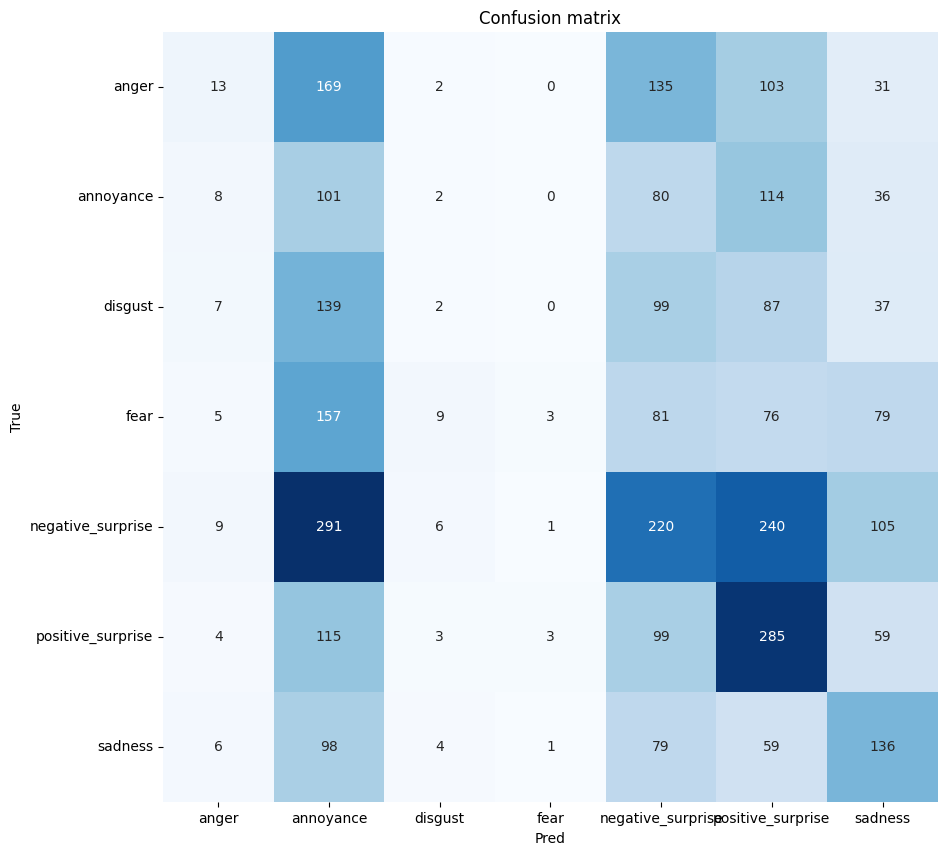

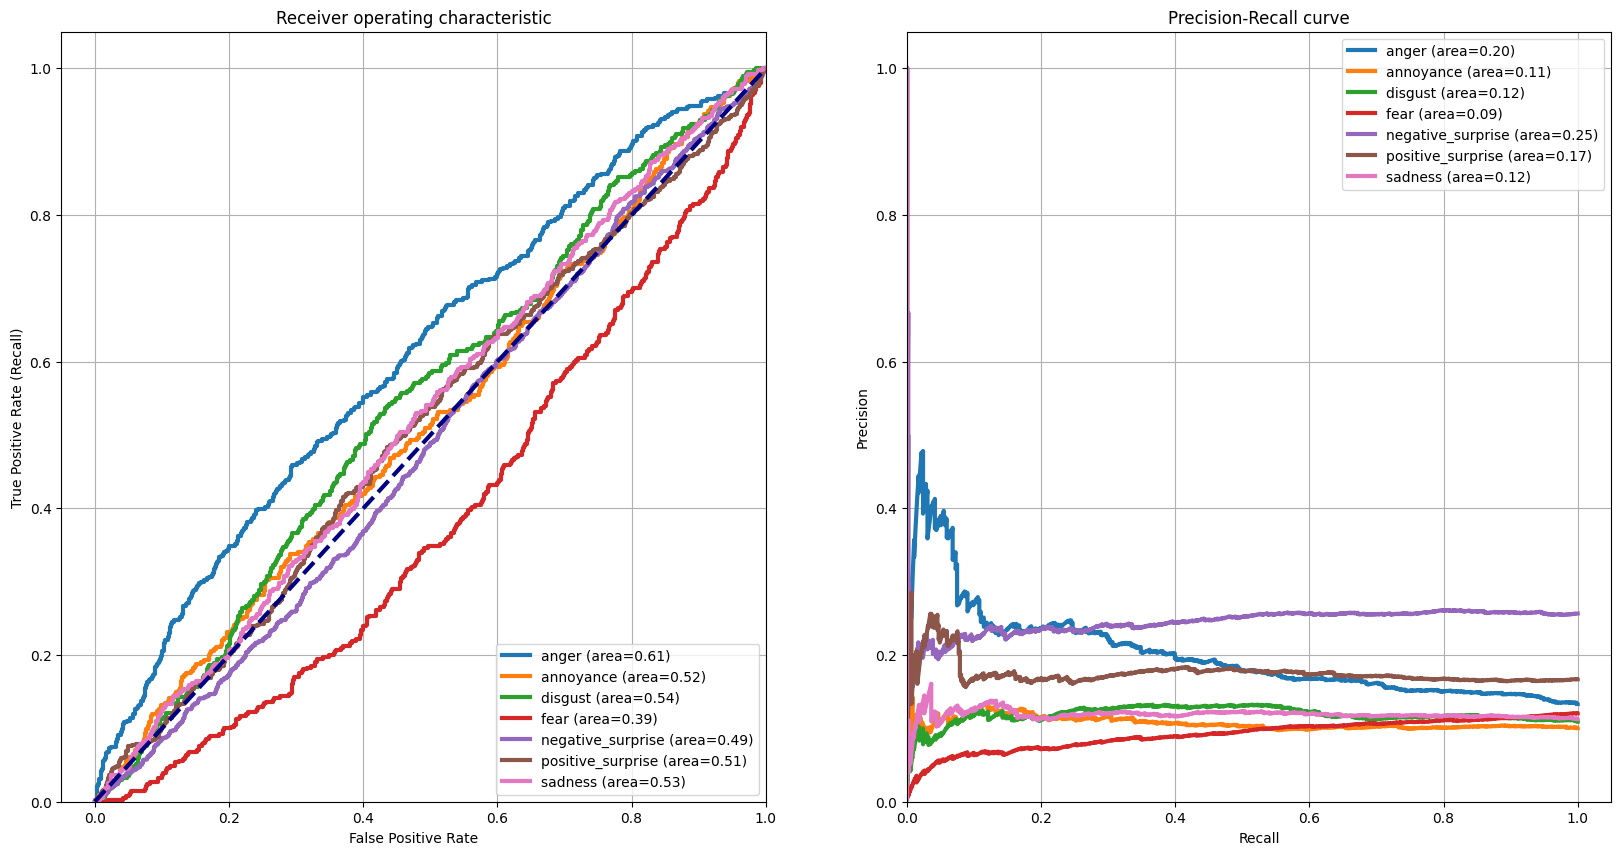

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test = combination_df["emotion"].values
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3,  label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()